![CC-BY-SA](https://mirrors.creativecommons.org/presskit/buttons/88x31/svg/by-sa.svg)


This notebook was created by [Bernardo Freitas Paulo da Costa](http://www.im.ufrj.br/bernardofpc),
and is licensed under Creative Commons BY-SA.

Antes de enviar este Teste, verifique que tudo está funcionando como esperado.
Por exemplo, **rode o código inteiro, do zero**.
Para isso, vá no menu, escolha _Kernel_, depois _Restart & Run All_.

Verifique, também, que você respondeu todas as questões:
* as questões de código têm `YOUR CODE HERE` (e você pode apagar o `raise NotImplemented` ao incluir sua resposta)
* as questões discursivas têm "YOUR ANSWER HERE".

---

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Integrais difíceis

Vimos em aula que os métodos de "alta ordem" convergem mais rápido quando a função é várias vezes diferenciável.
Neste teste, vamos olhar a situação contrária:
vamos integrar funções que não são
- diferenciáveis
- contínuas

no intervalo de integração, e ver como os métodos se comportam!

In [36]:
# Métodos do retângulo, ponto médio e simpson.
# Nomes: retangulo, midpoint, simpson
# Forma: (f,a,b,n=100)

def retangulo(f, a, b, n=1000):
  xs = np.linspace(a, b, n, endpoint=False)
  fxs = f(xs)
  return sum(fxs)*(b-a)/n

def midpoint(f, a, b, n=1000):
  x1 = np.linspace(a, b, n, endpoint=False)
  h = (b-a)/n

  h2 = (b-a)/(2*n)
  xs = x1 + h2
  fxs = f(xs)

  return sum(fxs)*h

def trapezio(f, a, b, n=1000):
  xs = np.linspace(a, b, n + 1, endpoint=True)
  h2 = (b-a)/(2*n)
  fxs = f(xs)
  y1 = fxs[1:]
  y2 = fxs[:-1]

  return sum((y1 + y2))*h2

def simpson(f, a, b, n=100):
  return (2*midpoint(f, a, b, n) + trapezio(f, a, b, n))/3

methods = [retangulo, midpoint, simpson]

# Parte 1: Integrando uma função que não é diferenciável

In [37]:
def df(f,x,h=2**-17):
    """17*3 = 54"""
    return (f(x+h) - f(x-h))/(2*h)

In [38]:
f = np.abs

## Questão 1: Dê uma primitiva de $f$.

In [39]:
def F(x):
    return (x**2)*np.sign(x)/2

In [40]:
assert np.abs(df(F,1) - 1) < 1e-12

In [41]:
assert np.abs(df(F,-2) - 2) < 2e-12

In [42]:
np.random.seed(1)
xs = np.random.randn(10)
relerr = (df(F,xs) - f(xs))/f(xs)
assert np.all(np.abs(relerr) < 2e-11)

$F$ é diferenciável em zero, mas é uma conta difícil

In [43]:
df(F,0)

3.814697265625e-06

## Questão 2: Convergência das integrais

A que velocidade decai o erro de integração de $f$ no intervalo $[0,1]$?

1. Faça um gráfico com alguns valores de $n$, para observar a ordem dos três métodos
    - Dica: `f.__name__` dá o nome de uma função, para você usar na legenda
2. Depois, dê a ordem do método do retângulo

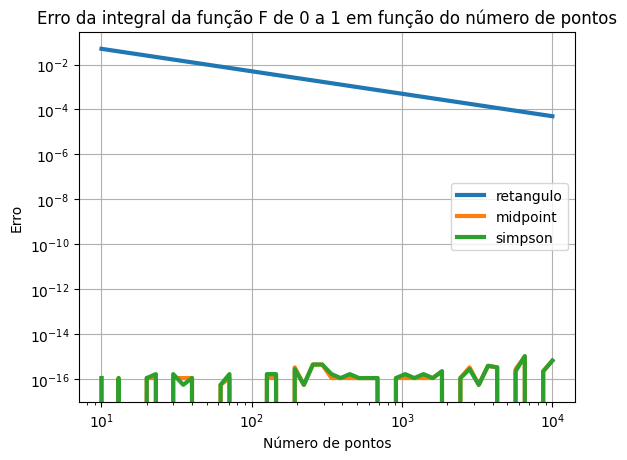

In [44]:
ans = F(1) - F(0)
ns = np.logspace(1,4,dtype=int)
for m in methods:
  tys = [abs(ans - m(f, 0, 1, int(n))) for n in ns]
  plt.plot(ns, tys, '-', label=m.__name__, linewidth=3)

plt.xscale('log')
plt.yscale('log')
plt.title(f"Erro da integral da função {F.__name__} de 0 a 1 em função do número de pontos")
plt.xlabel("Número de pontos")
plt.ylabel("Erro")
plt.grid()
plt.legend()
plt.show()

In [45]:
# Forma da resposta: decay_speed = n
# YOUR CODE HERE
raise NotImplementedError()

NotImplementedError: 

In [ ]:
for n in np.random.randint(100,10000, size=(6)):
    I1 = retangulo(f,0,1,n)
    err1 = np.abs(I1 - ans)
    I2 = retangulo(f,0,1,2*n)
    err2 = np.abs(I2 - ans)
    assert np.abs( err2/err1 - 2**-decay_speed ) < 2*n*1e-14

Explique porque o teste está dando a ordem de convergência (Bônus)

YOUR ANSWER HERE

Agora, explique o que aconteceu nos métodos do ponto médio e de Simpson.

YOUR ANSWER HERE

## Questão 3: Mudando o intervalo de integração

Agora, faça o gráfico do erro para o intervalo $[-1,2]$.

In [ ]:
# Faça aqui uma função genérica para "fazer gráficos de erro"
# f é a função, [a,b] o intervalo de integração, ans a "resposta correta"
def graph_err(f,a,b,ans):
    ns = np.logspace(1,4,dtype=int)
    for m in methods:
        tys = [abs(ans - m(f, a, b, int(n))) for n in ns]
        plt.plot(ns, tys, '-', label=m.__name__, linewidth=3)

    plt.xscale('log')
    plt.yscale('log')
    plt.title(f"Erro da integral em função do número de pontos")
    plt.xlabel("Número de pontos")
    plt.ylabel("Erro")
    plt.grid()
    plt.legend()

In [ ]:
a,b = -1,2
ans = F(b) - F(a)
graph_err(f,a,b,ans)
plt.show()

Quais são as velocidades de convergência dos métodos?

Você percebe algum comportamento especial?  Como explicar isso?

YOUR ANSWER HERE

Agora, repita o estudo para o intervalo $[-1,1]$.

Aqui, será melhor ter um gráfico separado para cada um dos três métodos.

In [ ]:
ans = F(1) - F(-1)
ns = np.logspace(1,4,dtype=int)
_, axs = plt.subplots(ncols=3, figsize=(15,4))
f = F
a, b = -1,1

for m,ax in zip(methods,axs):
    tys = [abs(ans - m(f, a, b, int(n))) for n in ns]
    ax.loglog(ns, tys, '-', label=m.__name__, linewidth=3)
    ax.grid()
    ax.legend()

plt.show()

O que aconteceu agora?
Porquê?

YOUR ANSWER HERE

## Questão 4: Intervalos "aleatórios"!

Como sugerido abaixo:
- Estude em três intervalos aleatórios;
- Para cada um deles, dê a evolução dos erros dos métodos conforme $n$ aumenta.

Aqui, usar a `graph_err` vai ser uma boa ideia ;-)

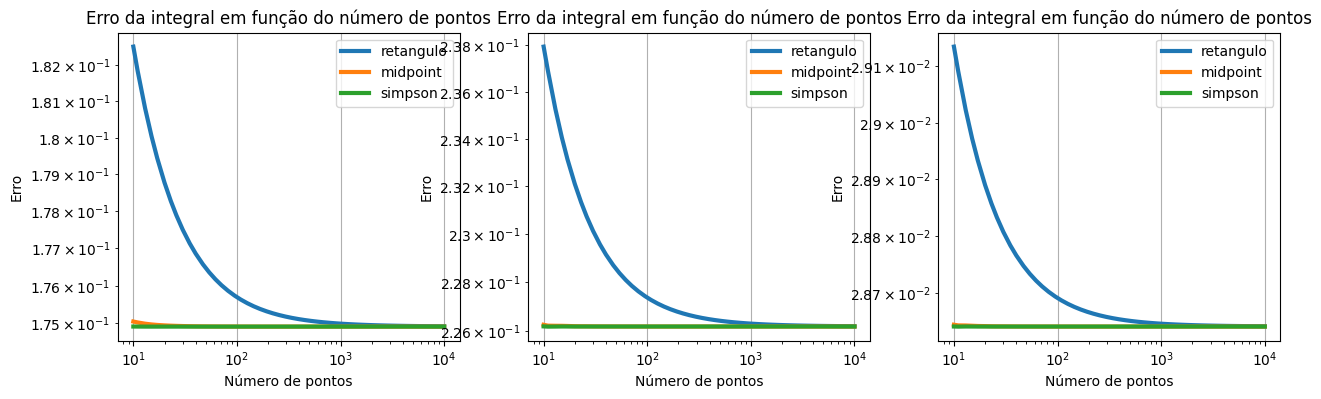

In [46]:
_, axs = plt.subplots(ncols=3, figsize=(15,4))
for ax in axs:
    # Três intervalos aleatórios!
    a,b = -np.random.rand(), np.random.rand()
    ax.set_title('$|x|$ in $[{:.2},{:.2}]$'.format(a,b))
    plt.sca(ax) # Porque a função "graph_err" age "no eixo corrente"
    ans = F(b) - F(a)
    graph_err(F,a,b,ans)
plt.show()

Como você interpreta o que aconteceu?

YOUR ANSWER HERE

# Parte 2: Uma função descontínua

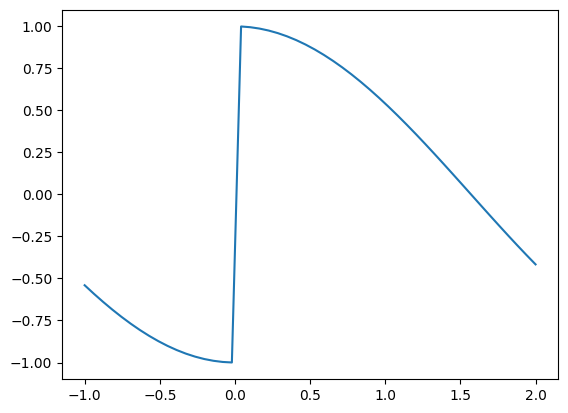

In [47]:
def g(x):
    return np.cos(x)*np.sign(x)

ts = np.linspace(-1,2)
plt.plot(ts, g(ts))
plt.show()

## Questão 5: Dê uma primitiva de $g$

In [ ]:
def G(x):
    # YOUR CODE HERE
    raise NotImplementedError()

In [ ]:
assert np.abs(df(G,1) - g(1)) < 1e-12

In [ ]:
np.random.seed(1)
xs = np.random.randn(10)
relerr = (df(G,xs) - g(xs))/g(xs)
assert np.all(np.abs(relerr) < 5e-11)

## Questão 6: Gráficos de erro!

- Para os intervalos [-1,1] e [-1,2]

In [ ]:
_, axs = plt.subplots(ncols=2, figsize=(13,4))
# YOUR CODE HERE
raise NotImplementedError()
plt.show()

E agora para três intervalos aleatórios

In [ ]:
# Um intervalo aleatório!
_, axs = plt.subplots(ncols=3, figsize=(15,4))
# YOUR CODE HERE
raise NotImplementedError()
plt.show()

O que você pode concluir sobre o comportamento dos três métodos para funções descontínuas?

Quais fenômenos são similares para funções contínuas, mas não diferenciáveis?
Porquê?

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()